<a href="https://colab.research.google.com/github/sauraviitj/Machine_learning_with_Python_Zero_to_Hero/blob/main/Linear_Regression_and_Logisitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression:
Linear regression is a statistical method and machine learning algorithm used to model the relationship between an independent variable (X) and a dependent variable (Y) by fitting a straight line to observed data.

It helps predict the value of Y based on X.

For a given equation y= mx+c where m is the slope and c is the gradient

suppose we are given a set of data        
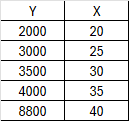



In [ ]:
#load important libraries
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X= np.array([20,25,30,35,40], dtype=np.float64) # value of X
Y=np.array([200,300,3500,500,1000],dtype=np.float64) #value of Y

#Normalise X and Y and bring the values between -1 to 1
X_norm=((X-X.mean())/X.std())
Y_norm=((Y-Y.mean())/Y.std())
print(f"X after normalisation {X_norm}")
print(f"Y after normalisation {Y_norm}")

X after normalisation [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
Y after normalisation [-0.73095882 -0.64974117  1.94922351 -0.48730588 -0.08121765]


In [ ]:
m=0.0 #initial weight of m
c=0.0 #initial weight of c

lr=0.001
epochs=100000
n=len(X) # length of data

In [ ]:
for epochs in range(epochs):
  Y_pred=m*X_norm+c # y= mx+c
  D_m=(-2/n) * np.sum((Y_norm-Y_pred)*X_norm) #d/dm
  D_c=(-2/n) * np.sum(Y_norm-Y_pred) #d/dc

  m=m-lr*D_m #updated weight of m
  c=c-lr*D_c #updated weught of c
  #print(D_c)
  if epochs % 10000==0:
    loss= np.mean((Y_norm-Y_pred)**2)
    print(f"Loss is {loss}")

Loss is 1.0
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618
Loss is 0.9572559366754618


In [ ]:
#Denormalise
Y_pred_norm= Y_pred
Y_pred=Y_pred_norm*Y.std()+Y.mean()
print(Y_pred)
X=X_norm*X.std()+X.mean()
print(X)
Y=Y_norm*Y.std()+Y.mean()
print(Y)

[ 740.  920. 1100. 1280. 1460.]
[20. 25. 30. 35. 40.]
[ 200.  300. 3500.  500. 1000.]


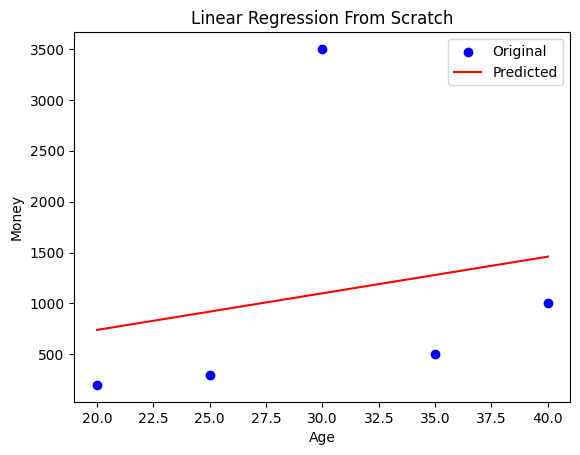

In [ ]:
plt.scatter(X,Y, color='blue', label="Original")
plt.plot(X,Y_pred, color='red', label='Predicted')
plt.xlabel("Age")
plt.ylabel("Money")
plt.legend()
plt.title("Linear Regression From Scratch")
plt.show()

In [ ]:
age= 28
age_norm=(age-X.mean())/X.std()
#print(age_norm)
Y_pred_norm= m*age_norm+c
Y_pred=Y_pred_norm*Y.std()+Y.mean()
print(Y_pred)

1028.0000000000025


##Mulitple Regression

In [ ]:
import numpy as np

# Independent variables
X = np.array([
    [10, 7, 70],
    [15, 8, 80],
    [8, 6, 60],
    [20, 9, 90],
    [12, 7, 75],
    [18, 8, 85],
    [5, 5, 50],
    [22, 9, 95],
    [17, 8, 88],
    [9, 6, 65]
])

# Target variable
y = np.array([75, 82, 68, 90, 78, 88, 60, 92, 86, 70])  # shape: (10,)

import numpy as np

# Independent variables: [Preparation, Skill, Health]
X_test = np.array([
    [14, 7, 78],
    [6, 5, 55],
    [19, 9, 92],
    [11, 7, 70],
    [16, 8, 83],
    [7, 6, 60],
    [13, 7, 74],
    [21, 9, 96],
    [10, 6, 68],
    [17, 8, 85]
])

# Target variable: performance/percentage
y_test = np.array([80, 62, 91, 74, 85, 66, 77, 93, 72, 88])



In [ ]:
print(f"Shape of X= {X.shape}")
print(f"Shape of y= {y.shape}")


Shape of X= (10, 3)
Shape of y= (10,)


In [ ]:

np.ones(X.shape[0],)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T

In [ ]:
print(X)
print(f"Shape of X= {X.shape}")
print(f"Shape of y= {y.shape}")

[[ 1. 10.  7. 70.]
 [ 1. 15.  8. 80.]
 [ 1.  8.  6. 60.]
 [ 1. 20.  9. 90.]
 [ 1. 12.  7. 75.]
 [ 1. 18.  8. 85.]
 [ 1.  5.  5. 50.]
 [ 1. 22.  9. 95.]
 [ 1. 17.  8. 88.]
 [ 1.  9.  6. 65.]]
Shape of X= (10, 4)
Shape of y= (10,)


In [ ]:
X[9:,1:]

array([[ 9.,  6., 65.]])

In [ ]:
X_test=np.vstack((np.ones(X_test.shape[0]), X_test.T)).T
print(X_test)

[[ 1. 14.  7. 78.]
 [ 1.  6.  5. 55.]
 [ 1. 19.  9. 92.]
 [ 1. 11.  7. 70.]
 [ 1. 16.  8. 83.]
 [ 1.  7.  6. 60.]
 [ 1. 13.  7. 74.]
 [ 1. 21.  9. 96.]
 [ 1. 10.  6. 68.]
 [ 1. 17.  8. 85.]]


In [ ]:
# Initialize a column vector of zeros with length equal to the number of features:
m = np.zeros((X.shape[1], 1))  # Shape: (num_features or number of parameters, 1 as in column)

# Explanation:
# np.zeros(...) creates an array filled with zeros.
# (X.shape[1], 1) is a tuple specifying a 2D shape:
#   - rows = number of features (X.shape[1])
#   - columns = 1, making it a column vector
# This kind of array is often used to store parameters like coefficients (theta) in linear regression.
print(m)

[[0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
def model(X, y, lr, epochs):
  """
  A simple linear regression model.

  Args:
    X: The input features, with a bias term.
    y: The target values.
    lr: The learning rate.
    epochs: The number of training epochs.

  Returns:
    A tuple containing the trained model parameters (m) and a list of losses
    over the training epochs.
  """
  n = y.size
  m = np.zeros((X.shape[1], 1))
  loss_list = []
  y = y.reshape(-1, 1)

  for i in range(epochs):
    # Calculate predictions
    y_pred = np.dot(X, m)

    # Calculate loss (Mean Squared Error)
    loss = np.sum((y_pred - y)**2) / (2 * n)

    # Calculate the gradient (derivative of the loss with respect to m)
    D_m = np.dot(X.T, (y_pred - y)) / n

    # Update the model parameters
    m = m - lr * D_m

    loss_list.append(loss)

    if i % 100 == 0:
      print(f"Loss after {i} epochs: {loss}")

  return m, loss_list

Loss after 0 epochs: 3163.05
Loss after 100 epochs: 920.9840491882945
Loss after 200 epochs: 274.0706754346489
Loss after 300 epochs: 87.40588339148863
Loss after 400 epochs: 33.53639951738633
Loss after 500 epochs: 17.98229703663936
Loss after 600 epochs: 13.48333061966866
Loss after 700 epochs: 12.17411549264001
Loss after 800 epochs: 11.785256149844699
Loss after 900 epochs: 11.661965027696827
Loss after 1000 epochs: 11.615316572356871
Loss after 1100 epochs: 11.590800159158757
Loss after 1200 epochs: 11.572687834750052
Loss after 1300 epochs: 11.556441590290525
Loss after 1400 epochs: 11.540752045998648
Loss after 1500 epochs: 11.525241376846285
Loss after 1600 epochs: 11.509800538875634
Loss after 1700 epochs: 11.494398039444967
Loss after 1800 epochs: 11.479024761804556
Loss after 1900 epochs: 11.463678045359586
Loss after 2000 epochs: 11.448357092356341
Loss after 2100 epochs: 11.43306164257572
Loss after 2200 epochs: 11.417791590942976
Loss after 2300 epochs: 11.402546877196997

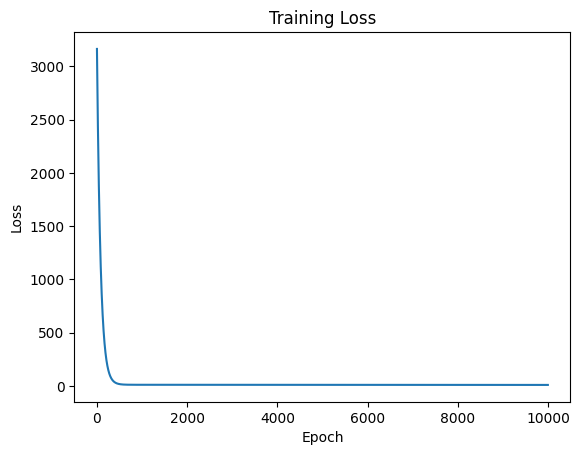

In [ ]:
epochs = 10000
lr = 1e-6
m, loss_list = model(X, y, lr=lr, epochs=epochs)

# Plot the loss over epochs
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [ ]:

y_pred =np.dot(X_test,m)
y_pred=y_pred.flatten()
Test_error=(1/X_test.shape[0])*np.sum((y_pred-y_test)**2)
print(y_pred-y_test)
print(f"TEst error is :{Test_error}")
print(y_pred.shape) #This is a 2-dimensional array (2D array or matrix) with 10 rows and 1 column
print(y_test.shape) #This is a 1-dimensional array (1D array or vector) with 10 elements.

print(y_pred.shape) #This is a 1-dimensional array (1D array or vector) with 10 elements.
Test_loss=np.sqrt((y_pred-y_test)**2)


[ 0.30065466 -5.61824332  3.94812186 -1.96241758  0.57497053 -4.40932878
 -0.7981808   6.11235865 -2.14625653 -0.34291107]
TEst error is :11.358859758581687
(10,)
(10,)
(10,)


[0.30065466 5.61824332 3.94812186 1.96241758 0.57497053 4.40932878
 0.7981808  6.11235865 2.14625653 0.34291107]


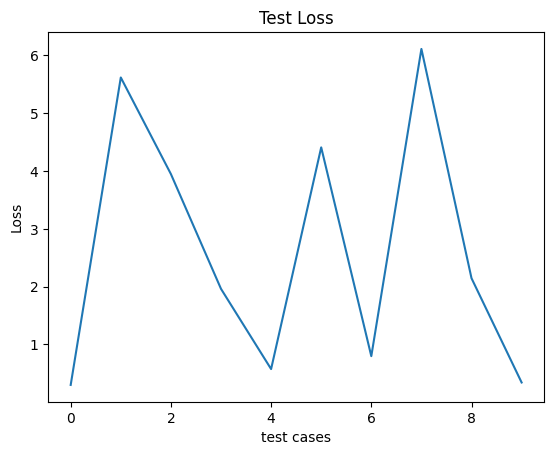

In [ ]:

#print(y_pred-y_test)

print(Test_loss)
plt.plot(Test_loss)
plt.xlabel("test cases")
plt.ylabel("Loss")
plt.title("Test Loss")
plt.show()


##Linear Regression with Pytorch


In [ ]:
import numpy as np
import torch

In [ ]:


# Features: [Study Hours, Attendance %]
inputs = np.array([
    [2, 40],
    [3, 50],
    [4, 60],
    [5, 65],
    [6, 70],
    [7, 75],
    [8, 80],
    [9, 85],
    [10, 90],
    [1, 30],
    [2, 35],
    [3, 45],
    [4, 50],
    [6, 72],
    [7, 78]] , dtype='float32'
)

# Target: Pass (1) or Fail (0)
targets = np.array([
    [45, 70],
    [52, 72],
    [60, 75],
    [65, 78],
    [70, 80],
    [75, 82],
    [80, 85],
    [85, 88],
    [90, 90],
    [35, 65],
    [40, 68],
    [50, 72],
    [55, 73],
    [72, 81],
    [78, 84]
], dtype='float32')



In [ ]:
inputs= torch.from_numpy(inputs)
targets= torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 2., 40.],
        [ 3., 50.],
        [ 4., 60.],
        [ 5., 65.],
        [ 6., 70.],
        [ 7., 75.],
        [ 8., 80.],
        [ 9., 85.],
        [10., 90.],
        [ 1., 30.],
        [ 2., 35.],
        [ 3., 45.],
        [ 4., 50.],
        [ 6., 72.],
        [ 7., 78.]])
tensor([[45., 70.],
        [52., 72.],
        [60., 75.],
        [65., 78.],
        [70., 80.],
        [75., 82.],
        [80., 85.],
        [85., 88.],
        [90., 90.],
        [35., 65.],
        [40., 68.],
        [50., 72.],
        [55., 73.],
        [72., 81.],
        [78., 84.]])


In [ ]:
#iniitialing weights and biases
w= torch.randn(2,2, requires_grad=True)
b= torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[0.3372, 0.1345],
        [0.0183, 0.4417]], requires_grad=True)
tensor([ 1.2575, -0.4850], requires_grad=True)


In [ ]:
w.shape

torch.Size([2, 2])

( N*2 )*(2*2)/w +(N*2)/bias =N*2

In [ ]:
def model(x):
  return x @ w.t() +b

In [ ]:
#generate prediction
preds =model(inputs)
print(preds)
print(f'targets : {targets}')

tensor([[ 7.3109, 17.2211],
        [ 8.9928, 21.6569],
        [10.6748, 26.0926],
        [11.6843, 28.3196],
        [12.6939, 30.5466],
        [13.7034, 32.7736],
        [14.7130, 35.0006],
        [15.7225, 37.2276],
        [16.7321, 39.4546],
        [ 5.6289, 12.7854],
        [ 6.6385, 15.0125],
        [ 8.3204, 19.4482],
        [ 9.3300, 21.6752],
        [12.9628, 31.4301],
        [14.1069, 34.0988]], grad_fn=<AddBackward0>)
targets : tensor([[45., 70.],
        [52., 72.],
        [60., 75.],
        [65., 78.],
        [70., 80.],
        [75., 82.],
        [80., 85.],
        [85., 88.],
        [90., 90.],
        [35., 65.],
        [40., 68.],
        [50., 72.],
        [55., 73.],
        [72., 81.],
        [78., 84.]])


In [ ]:
def mse(pred,actual):
  diff=pred-actual
  mse= torch.sum(diff**2)/diff.numel()
  return mse

In [ ]:
loss= mse(preds, targets)
print(loss)

tensor(2731.4014, grad_fn=<DivBackward0>)


In [ ]:
loss.backward()

In [ ]:
with torch.no_grad():
  w-=w.grad*1e-5
  b-=b.grad*1e-5
  w.grad.zero_()
  b.grad.zero_()

In [ ]:
preds=model(inputs)
loss=mse(preds,targets)
print(loss)

tensor(2518.2639, grad_fn=<DivBackward0>)


In [ ]:
for i in range(1000):
  preds=model(inputs)
  loss=mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w-=w.grad*1e-5
    b-=b.grad*1e-5
    w.grad.zero_()
    w.grad.zero_()



In [ ]:
preds=model(inputs)
loss=mse(preds,targets)
print(loss)

tensor(5.3434, grad_fn=<DivBackward0>)


In [ ]:
preds

tensor([[47.6828, 67.4932],
        [55.1894, 72.4033],
        [62.6960, 77.3133],
        [66.6462, 79.7106],
        [70.5964, 82.1079],
        [74.5466, 84.5052],
        [78.4967, 86.9025],
        [82.4469, 89.2998],
        [86.3971, 91.6971],
        [40.1762, 62.5832],
        [44.1264, 64.9805],
        [51.6330, 69.8905],
        [55.5832, 72.2878],
        [72.0189, 83.1131],
        [76.6804, 86.0129]], grad_fn=<AddBackward0>)

In [ ]:
targets

tensor([[45., 70.],
        [52., 72.],
        [60., 75.],
        [65., 78.],
        [70., 80.],
        [75., 82.],
        [80., 85.],
        [85., 88.],
        [90., 90.],
        [35., 65.],
        [40., 68.],
        [50., 72.],
        [55., 73.],
        [72., 81.],
        [78., 84.]])

Linear regression using PyTorch built-ins